In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import numpy as np
import pylab
import sklearn.mixture as mixture
import pyclustertend 
import random
from itertools import permutations


%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
#Cargado de archivos
#diabetes_mellitus  =  pd.read_excel('archivos/diabetes_mellitus.xlsx')
#matrimonios = pd.read_excel('archivos/matrimonios.xlsx')
#porcentaje_nacimientos = pd.read_excel('archivos/porcentaje_nacimientos.xlsx')
#tasaMortalidadInfantil = pd.read_excel('archivos/tasaMortalidadInfantil.xlsx')
#nacimientosResidenciaMadre = pd.read_excel('archivos/NacimientosResidenciaMadre.xlsx')
#mortalidadExterna = pd.read_excel('archivos/MortalidadExterna.xlsx')
#porcentajePesoNacer = pd.read_excel('archivos/PorcentajePesoNacer.xlsx')
#divorcios = pd.read_excel('archivos/Divorcios.xlsx')

mortalidadVIH_SIDA = pd.read_excel('archivos/MortalidadVIH_SIDA.xlsx')
defunciones = pd.read_excel('archivos/defunciones2.xlsx')
enfermedades = pd.read_excel('archivos/CIE.xlsx')

d10 = pd.read_excel("Archivos/Datos2010.xlsx")
d11 = pd.read_excel("Archivos/Datos2011.xlsx")
d12 = pd.read_excel("Archivos/Datos2012.xlsx")
d13 = pd.read_excel("Archivos/Datos2013.xlsx")
d14 = pd.read_excel("Archivos/Datos2014.xlsx")
d15 = pd.read_excel("Archivos/Datos2015.xlsx")
d16 = pd.read_excel("Archivos/Datos2016.xlsx")
d17 = pd.read_excel("Archivos/Datos2017.xlsx")
d18 = pd.read_excel("Archivos/Datos2018.xlsx")
d19 = pd.read_excel("Archivos/Datos2019.xlsx")
d20 = pd.read_excel("Archivos/Datos2020.xlsx")

In [3]:
def toLower(arr):
    return [i.lower() for i in arr]

enfermedades = pd.read_excel('Archivos/CIE10.xlsx')

In [4]:
datos = [d10, d11, d12, d13, d14, d15, d16, d17, d18, d19, d20]

for i in datos:
    i.columns = toLower(i.columns)

In [5]:
defunciones.columns = toLower(defunciones.columns)

for i in range(len(datos)):
    print((i+10), list(datos[i].columns))
    print(9, list(defunciones.columns))
    print((i+10), set(defunciones)-set(datos[i]))
    print((i+10), set(datos[i])-set(defunciones))
    print(" ")

10 ['depreg', 'mupreg', 'mesreg', 'añoreg', 'depocu', 'mupocu', 'areag', 'sexo', 'diaocu', 'mesocu', 'añoocu', 'edadif', 'perdif', 'getdif', 'ecidif', 'escodif', 'ocudif', 'dnadif', 'mnadif', 'nacdif', 'dredif', 'mredif', 'caudef', 'asist', 'ocur', 'cerdef']
9 ['depreg', 'mupreg', 'mesreg', 'añoreg', 'depocu', 'mupocu', 'areag', 'sexo', 'diaocu', 'mesocu', 'añoocu', 'edadif', 'perdif', 'getdif', 'ecidif', 'ocudif', 'dnadif', 'mnadif', 'nacdif', 'dredif', 'mredif', 'caudef', 'asist', 'ocur', 'cerdef']
10 set()
10 {'escodif'}
 
11 ['depreg', 'mupreg', 'mesreg', 'añoreg', 'depocu', 'mupocu', 'areag', 'sexo', 'diaocu', 'mesocu', 'añoocu', 'edadif', 'perdif', 'getdif', 'ecidif', 'escodif', 'ocudif', 'dnadif', 'mnadif', 'nacdif', 'dredif', 'mredif', 'caudef', 'asist', 'ocur', 'cerdef']
9 ['depreg', 'mupreg', 'mesreg', 'añoreg', 'depocu', 'mupocu', 'areag', 'sexo', 'diaocu', 'mesocu', 'añoocu', 'edadif', 'perdif', 'getdif', 'ecidif', 'ocudif', 'dnadif', 'mnadif', 'nacdif', 'dredif', 'mredif',

In [6]:
for i in range(len(datos)):
    if 'añoocu' not in datos[i].columns:
        datos[i]['añoocu'] = 2000 + (i+10)
        
for i in datos:
    print(list(i.columns))
    
    
df1 = defunciones.copy()

['depreg', 'mupreg', 'mesreg', 'añoreg', 'depocu', 'mupocu', 'areag', 'sexo', 'diaocu', 'mesocu', 'añoocu', 'edadif', 'perdif', 'getdif', 'ecidif', 'escodif', 'ocudif', 'dnadif', 'mnadif', 'nacdif', 'dredif', 'mredif', 'caudef', 'asist', 'ocur', 'cerdef']
['depreg', 'mupreg', 'mesreg', 'añoreg', 'depocu', 'mupocu', 'areag', 'sexo', 'diaocu', 'mesocu', 'añoocu', 'edadif', 'perdif', 'getdif', 'ecidif', 'escodif', 'ocudif', 'dnadif', 'mnadif', 'nacdif', 'dredif', 'mredif', 'caudef', 'asist', 'ocur', 'cerdef']
['depreg', 'mupreg', 'mesreg', 'añoreg', 'depocu', 'mupocu', 'areag', 'sexo', 'diaocu', 'mesocu', 'edadif', 'perdif', 'getdif', 'ecidif', 'escodif', 'ocudif', 'pnadif', 'dnadif', 'mnadif', 'nacdif', 'predif', 'dredif', 'mredif', 'caudef', 'asist', 'ocur', 'cerdef', 'añoocu']
['depreg', 'mupreg', 'mesreg', 'añoreg', 'depocu', 'mupocu', 'areag', 'sexo', 'diaocu', 'mesocu', 'edadif', 'perdif', 'puedif', 'ecidif', 'escodif', 'ciuodif', 'pnadif', 'dnadif', 'mnadif', 'nacdif', 'predif', 'd

In [7]:
df1.pop('ocudif')
df1.pop('getdif')
df1.pop('areag')

0        9
1        9
2        9
3        9
4        9
        ..
71702    1
71703    1
71704    1
71705    1
71706    1
Name: areag, Length: 71707, dtype: int64

In [8]:
selected_columns = df1.columns
print(selected_columns)
datos2 = []
for i in datos:
    datos2.append(i[selected_columns])

Index(['depreg', 'mupreg', 'mesreg', 'añoreg', 'depocu', 'mupocu', 'sexo',
       'diaocu', 'mesocu', 'añoocu', 'edadif', 'perdif', 'ecidif', 'dnadif',
       'mnadif', 'nacdif', 'dredif', 'mredif', 'caudef', 'asist', 'ocur',
       'cerdef'],
      dtype='object')


In [9]:
defunciones.pop('ocudif')
defunciones.pop('getdif')
defunciones.pop('areag')

new_df = defunciones.copy()

for i in datos2:
    new_df = pd.concat([new_df, i])

In [10]:
new_df['añoocu'] = new_df['añoocu'].replace({x: 2009 for x in new_df['añoocu'] if x == 9})
print(new_df['añoocu'].unique())

[2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]


In [11]:
new_df.to_csv('Archivos/NewDataAll.csv')

# Empieza el análisis exploratorio de los datos ya concatenados

In [12]:
new_df.describe()

,depreg,mupreg,mesreg,añoreg,depocu,mupocu,sexo,diaocu,mesocu,añoocu,edadif,perdif,ecidif,dnadif,nacdif,dredif,mredif,asist,ocur,cerdef
count,953751.000000,953751.000000,953751.000000,953751.000000,953751.000000,953751.000000,953751.000000,953751.000000,953751.000000,953751.000000,953751.000000,953751.000000,953751.000000,953751.000000,953751.000000,953751.000000,953751.000000,953751.000000,953751.000000,953751.000000
mean,8.624103,868.343108,6.497149,1864.431516,8.594823,865.675331,1.435824,15.670475,6.554253,2014.774764,61.604620,2.913761,1.465784,11.395372,361.019104,15.364511,1549.922030,3.107059,4.762325,3.746250
std,6.700841,671.594121,3.440933,529.034880,6.678798,668.895018,0.495865,8.817019,3.435534,3.468554,91.537096,0.726326,0.954254,23.726167,792.985904,23.590171,2381.441909,2.025948,2.276204,3.768895
min,1.000000,101.000000,1.000000,9.000000,1.000000,101.000000,1.000000,1.000000,1.000000,2009.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,101.000000,1.000000,1.000000,1.000000
25%,1.000000,105.000000,4.000000,2012.000000,1.000000,110.000000,1.000000,8.000000,4.000000,2012.000000,31.000000,3.000000,1.000000,4.000000,320.000000,3.000000,301.000000,1.000000,4.000000,1.000000
50%,9.000000,901.000000,7.000000,2015.000000,9.000000,901.000000,1.000000,16.000000,7.000000,2015.000000,60.000000,3.000000,1.000000,10.000000,320.000000,10.000000,1006.000000,4.000000,6.000000,1.000000
75%,14.000000,1406.000000,9.000000,2018.000000,14.000000,1406.000000,2.000000,23.000000,10.000000,2018.000000,78.000000,3.000000,2.000000,16.000000,320.000000,16.000000,1608.000000,5.000000,6.000000,9.000000
max,22.000000,2217.000000,12.000000,2021.000000,22.000000,2217.000000,2.000000,31.000000,12.000000,2020.000000,999.000000,9.000000,9.000000,9999.000000,9999.000000,99.000000,9999.000000,9.000000,9.000000,9.000000


In [13]:
new_df.shape

(953751, 22)

In [14]:
new_df

,depreg,mupreg,mesreg,añoreg,depocu,mupocu,sexo,diaocu,mesocu,añoocu,...,ecidif,dnadif,mnadif,nacdif,dredif,mredif,caudef,asist,ocur,cerdef
0,5,505,1,9,5,505,1,2,1,2009,...,1,1,101,0,1,101,Y214,1,3,1
1,1,101,9,9,1,101,1,27,9,2009,...,1,1,101,0,1,101,X919,4,3,1
2,22,2206,9,9,22,2206,2,23,8,2009,...,1,1,101,0,1,101,X959,4,3,2
3,2,201,12,9,2,201,1,5,12,2009,...,1,1,101,0,1,101,V899,4,3,1
4,1,101,5,9,1,101,2,7,5,2009,...,2,1,101,0,1,101,X709,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95996,9,901,4,2020,9,901,1,7,4,2020,...,9,99,9999,9999,99,9999,R99X,1,1,1
95997,10,1001,11,2020,10,1001,1,22,10,2020,...,9,99,9999,9999,99,9999,J984,5,6,9
95998,1,101,6,2020,1,101,1,27,6,2020,...,9,99,9999,9999,99,9999,U071,1,1,1
95999,9,901,2,2020,9,901,1,23,2,2020,...,9,99,9999,9999,99,9999,K709,1,1,1


In [15]:
new_df['caudef']
enfermedades2 = enfermedades.copy()
enfermedades2.loc[enfermedades2['CAUSA'].str.len() == 3, 'CAUSA'] = enfermedades2.loc[enfermedades2['CAUSA'].str.len() == 3, 'CAUSA'] + "X"
enfermedades2

new_df2 = pd.merge(new_df, enfermedades2, left_on='caudef', right_on='CAUSA', how='left')

new_df2 = new_df2.dropna()
causas_infecciones = new_df2.loc[new_df2["DESCRIPCION"].str.contains("Infecciones|infecciones|infeccion|Infección|Infeccion|infección")]

causas_vih = new_df2.loc[new_df2["DESCRIPCION"].str.contains("VIH|vih|SIDA")]

In [16]:
len(causas_vih)

5068

<AxesSubplot: xlabel='Año', ylabel='Muertes por VIH'>

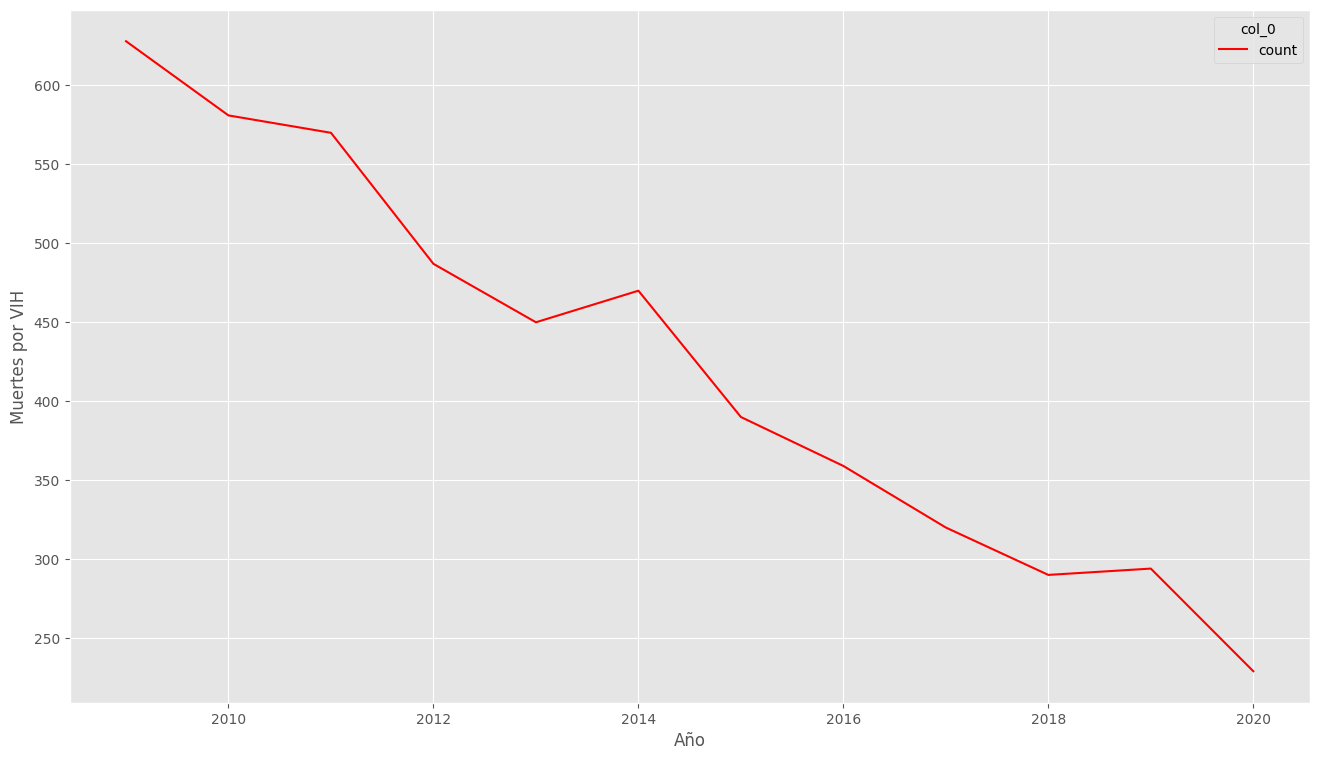

In [17]:
tf_vih = pd.crosstab(index=causas_vih["añoocu"], columns="count")
tf_vih
#1e6466
tf_vih.plot(color='red', ylabel='Muertes por VIH', xlabel='Año')

<AxesSubplot: xlabel='sexo'>

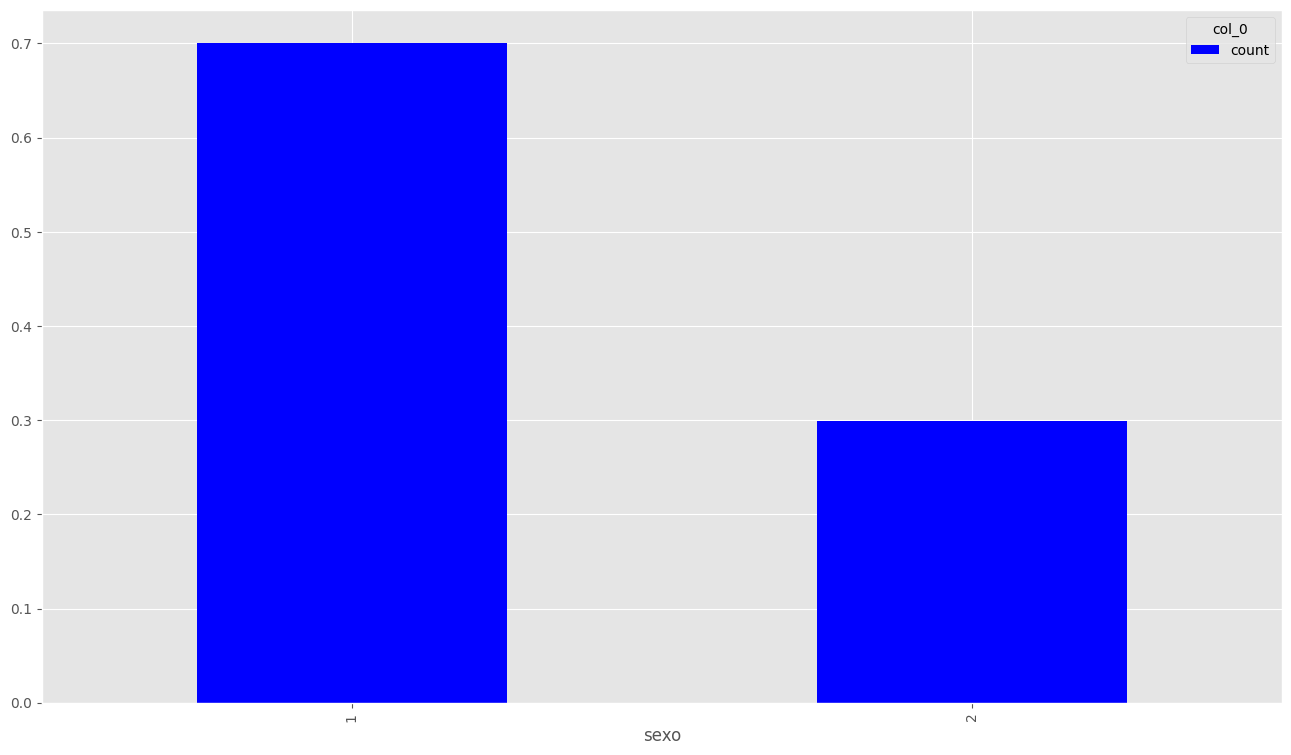

In [18]:
tf_vih2 = pd.crosstab(index=causas_vih["sexo"],  columns='count')
tf_vih2['count'] = tf_vih2['count']/len(causas_vih)
tf_vih2.plot.bar(color=['blue', 'pink'])

In [19]:
from scipy.stats import chi2_contingency


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

columns = new_df2.columns
corr_matrix = [[] for i in range(len(columns))]

for i in range(len(columns)):
    for j in range(len(columns)):
        corr_matrix[i].append(cramers_v(new_df2[columns[i]], new_df2[columns[j]]))

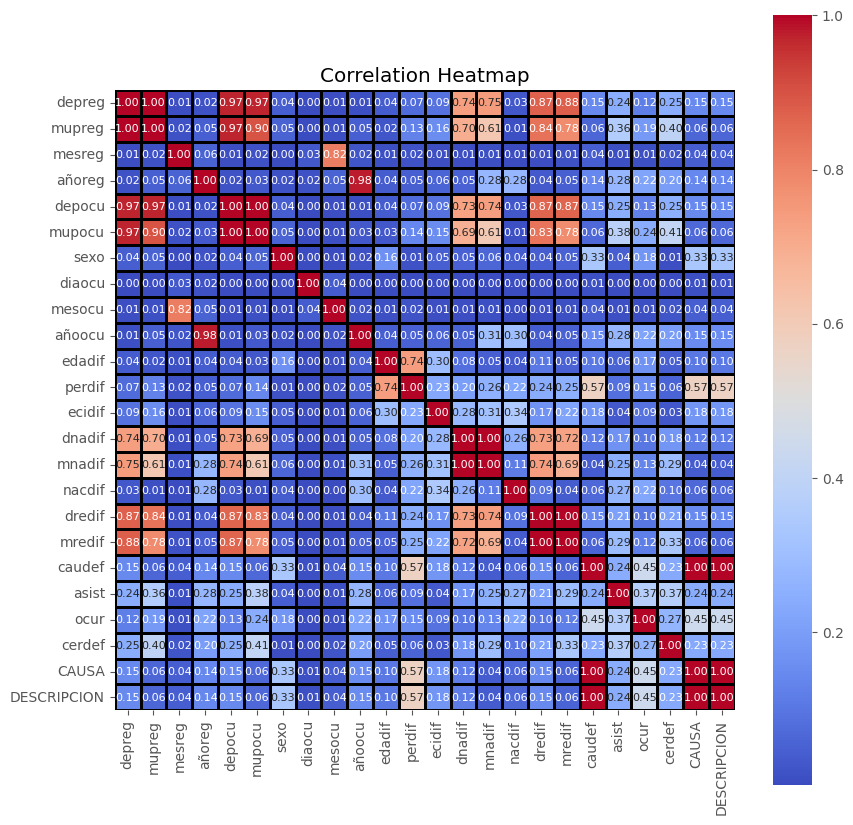

In [20]:
import seaborn as sns

corr_df = pd.DataFrame(corr_matrix, index=columns, columns=columns)

plt.figure(figsize=(10, 10))
sns.heatmap(corr_df,annot=True, annot_kws={"size": 8}, cmap='coolwarm', fmt=".2f", linecolor="black",linewidths=1,square=True)
plt.title("Correlation Heatmap")
plt.show()

<AxesSubplot: ylabel='Frequency'>

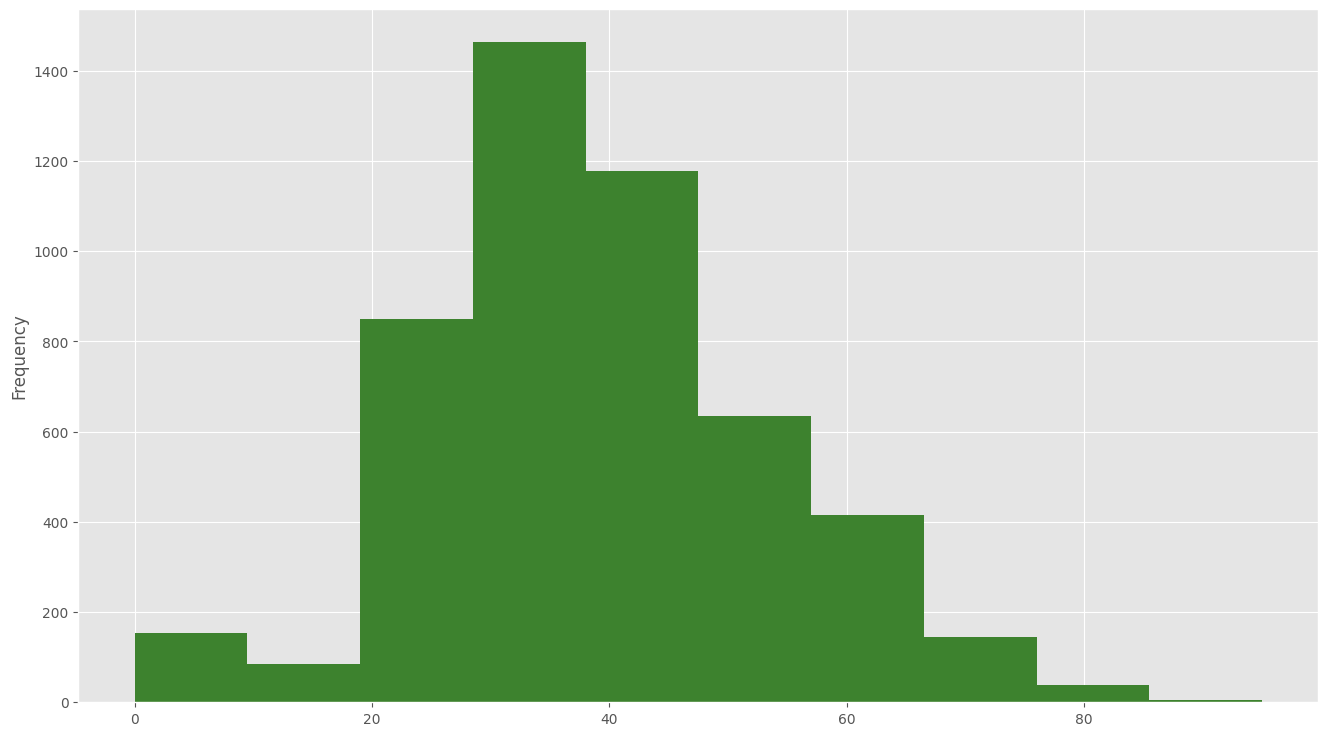

In [21]:
# crear la tabla de frecuencia para la variable "Caudef"
tabla_frecuencia = pd.crosstab(index=causas_vih["mesocu"], columns="count")

edad_vih = causas_vih.loc[causas_vih['edadif']<200]
edad_vih['edadif'].plot.hist(color='#3d822e')

<AxesSubplot: ylabel='porcentaje'>

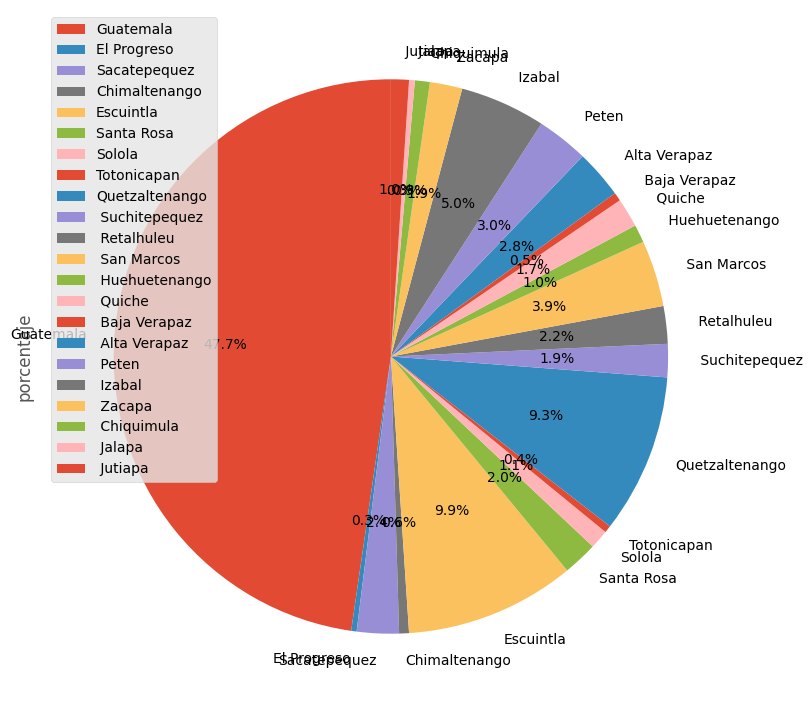

In [22]:
tf3_vih = pd.crosstab(index=causas_vih["depocu"], columns= "avg")

departamentos = ['Guatemala',
    'El Progreso',
    'Sacatepequez',
    'Chimaltenango',
    'Escuintla',
    'Santa Rosa',
    'Solola',
    'Totonicapan',
    'Quetzaltenango',
    ' Suchitepequez',
    ' Retalhuleu',
    ' San Marcos',
    ' Huehuetenango',
    ' Quiche',
    ' Baja Verapaz',
    ' Alta Verapaz',
    ' Peten',
    ' Izabal',
    ' Zacapa',
    ' Chiquimula',
    ' Jalapa',
    ' Jutiapa']

tf3_vih['avg'] = (tf3_vih['avg']/len(causas_vih))*100
temp = tf3_vih.copy()
temp = pd.DataFrame()
temp['avg']= tf3_vih['avg']
temp['depocu'] = tf3_vih.index
temp['departamento'] = departamentos
tf3_vih = temp.copy()
tf3_vih.plot(kind='pie', y='avg', labels=tf3_vih['departamento'], autopct='%1.1f%%', startangle=90, ylabel='porcentaje', xlabel='Porcentaje de muertes por departamento')

In [23]:
cvih2 = causas_vih.loc[causas_vih['edadif']<200]

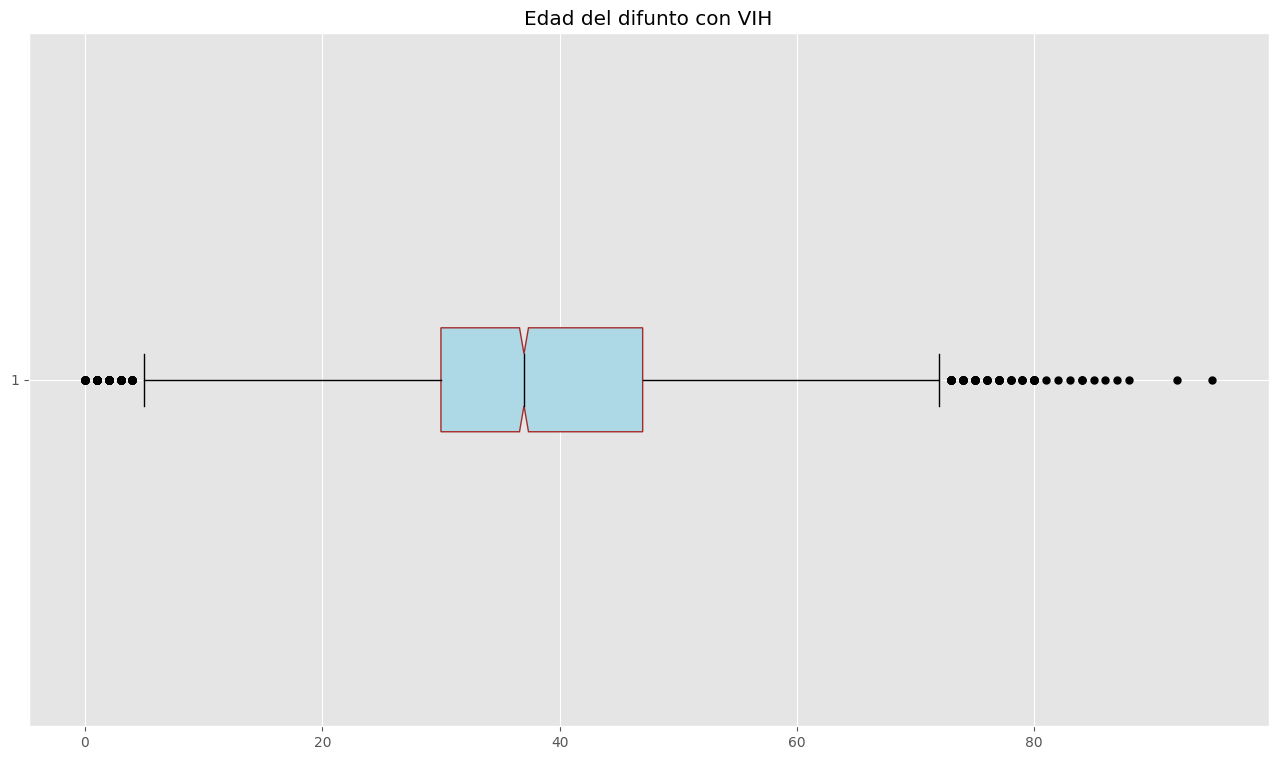

In [24]:
# crear el boxplot
plt.boxplot(causas_vih.loc[causas_vih['edadif']<200]['edadif'], 
            vert=False,    # colocar el gráfico en horizontal
            notch=True,    # dibujar una marca en el centro de cada caja
            patch_artist=True,    # rellenar las cajas con colores
            boxprops=dict(facecolor='lightblue', edgecolor='brown'),    # color y borde de las cajas
            flierprops=dict(marker='o', markersize=5, markerfacecolor='black'),    # estilo de los puntos fuera de las cajas
            medianprops=dict(color='black'),    # estilo de las líneas medianas
            whiskerprops=dict(color='black'),    # estilo de los bigotes
            capprops=dict(color='black')    # estilo de las líneas que terminan los bigotes
           )

# establecer el título del gráfico
plt.title("Edad del difunto con VIH")

# mostrar el gráfico
plt.show()

# Clustering

In [34]:
def changeColumns(df, order):
    curr = df.columns.tolist()
    body = [column for column in curr if column not in order]
    new = order + body
    new_df = df[new]
    return new_df

In [39]:
enf = enfermedades2.copy()
enf['caunum'] = enf.index
sample_sz = 10000
order = ['edadif', 'caunum']


temp = pd.merge(new_df2, enf[['caunum', 'DESCRIPCION']], on='DESCRIPCION', how='left')

temp.pop('caudef')
temp.pop('CAUSA')
temp.pop('DESCRIPCION')
temp.pop('mnadif')
temp = temp.loc[temp['edadif']<200]
new_temp = changeColumns(temp, order)

X = np.array(new_temp)
random.seed(123)
sampleIdx = random.sample(range(len(X)), sample_sz)
sample = X[sampleIdx]
X = sample

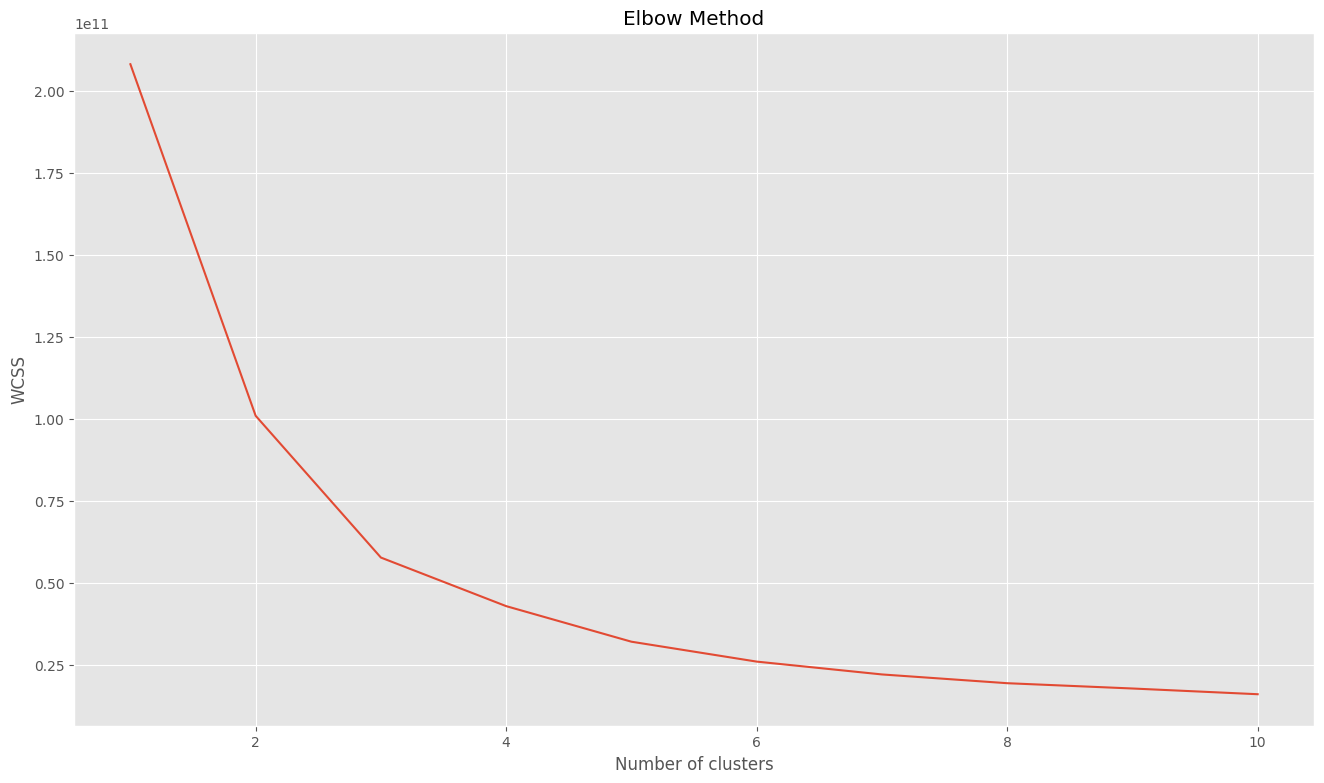

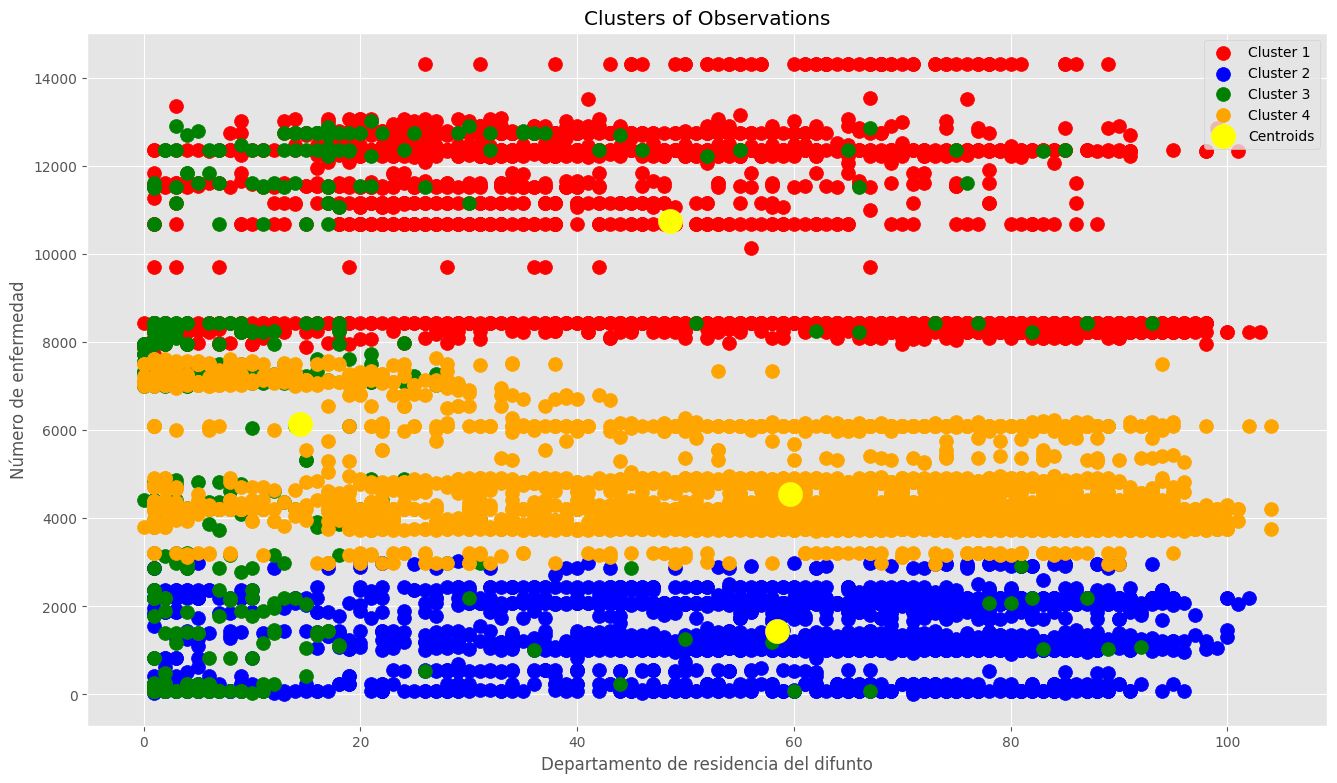

In [40]:
# Preprocess the data
# Handle missing values, scale the data, and encode categorical variables if necessary

# Determine the number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=i, init='k-means++', random_state=123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit the K-means model
kmeans = cluster.KMeans(n_clusters=4, init='k-means++', random_state=123)
y_kmeans = kmeans.fit_predict(X)

# Visualize the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='orange', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Observations')
plt.xlabel('Departamento de residencia del difunto')
plt.ylabel('Número de enfermedad')
plt.legend()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5390864396615762
For n_clusters = 3 The average silhouette_score is : 0.5956632100193098
For n_clusters = 4 The average silhouette_score is : 0.4460454815555266
For n_clusters = 5 The average silhouette_score is : 0.4618666585856811
For n_clusters = 6 The average silhouette_score is : 0.4640445847858791


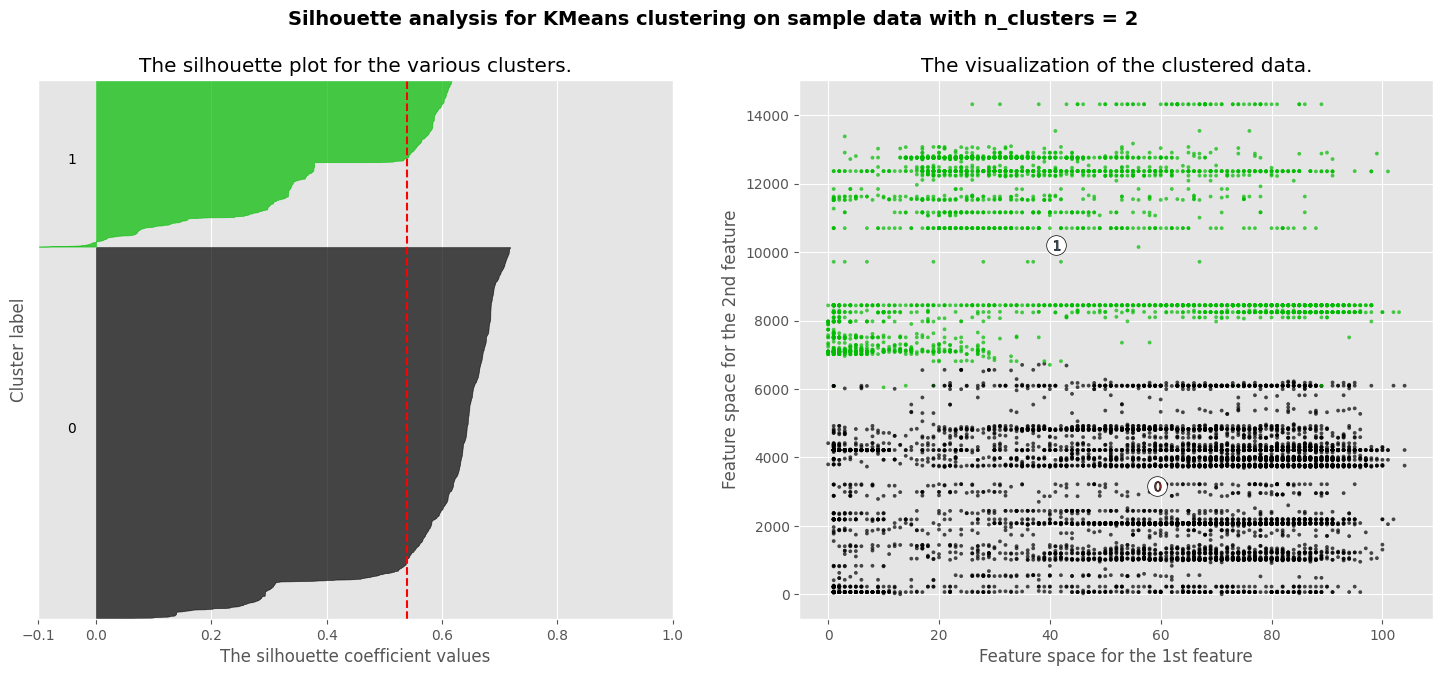

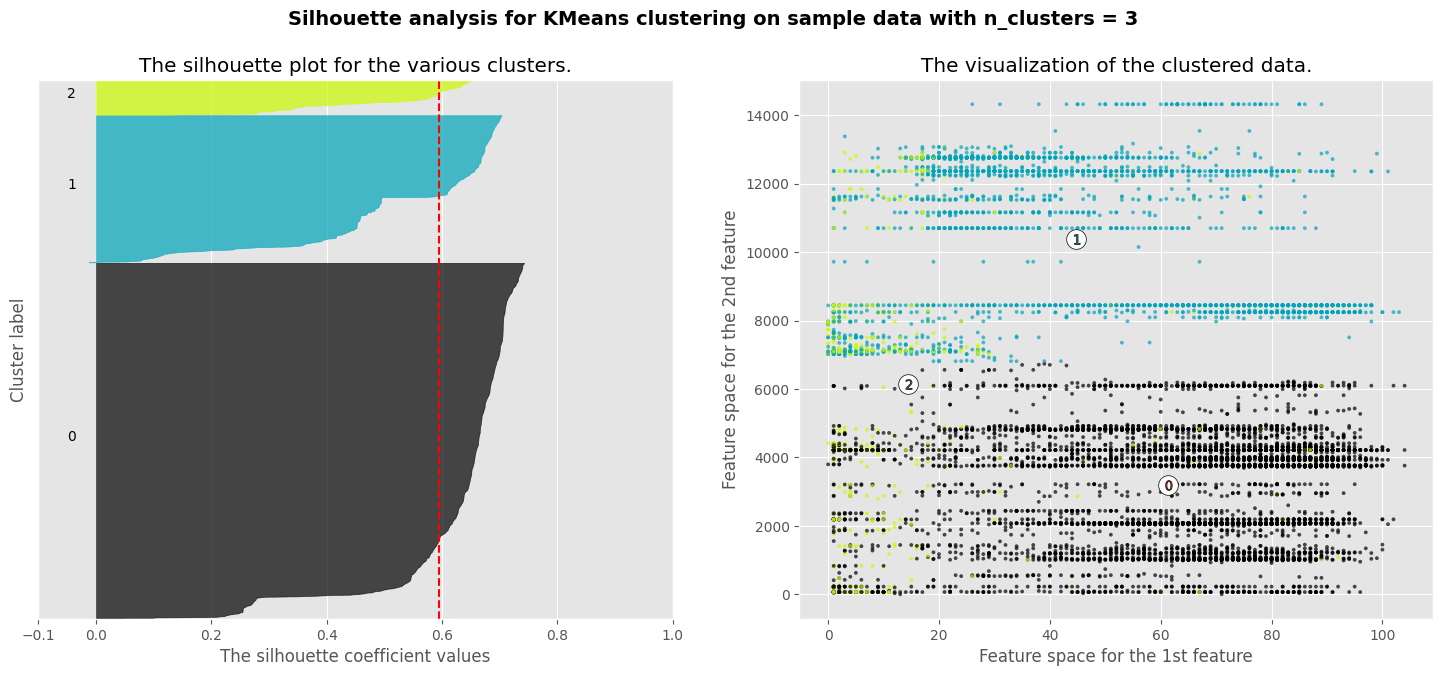

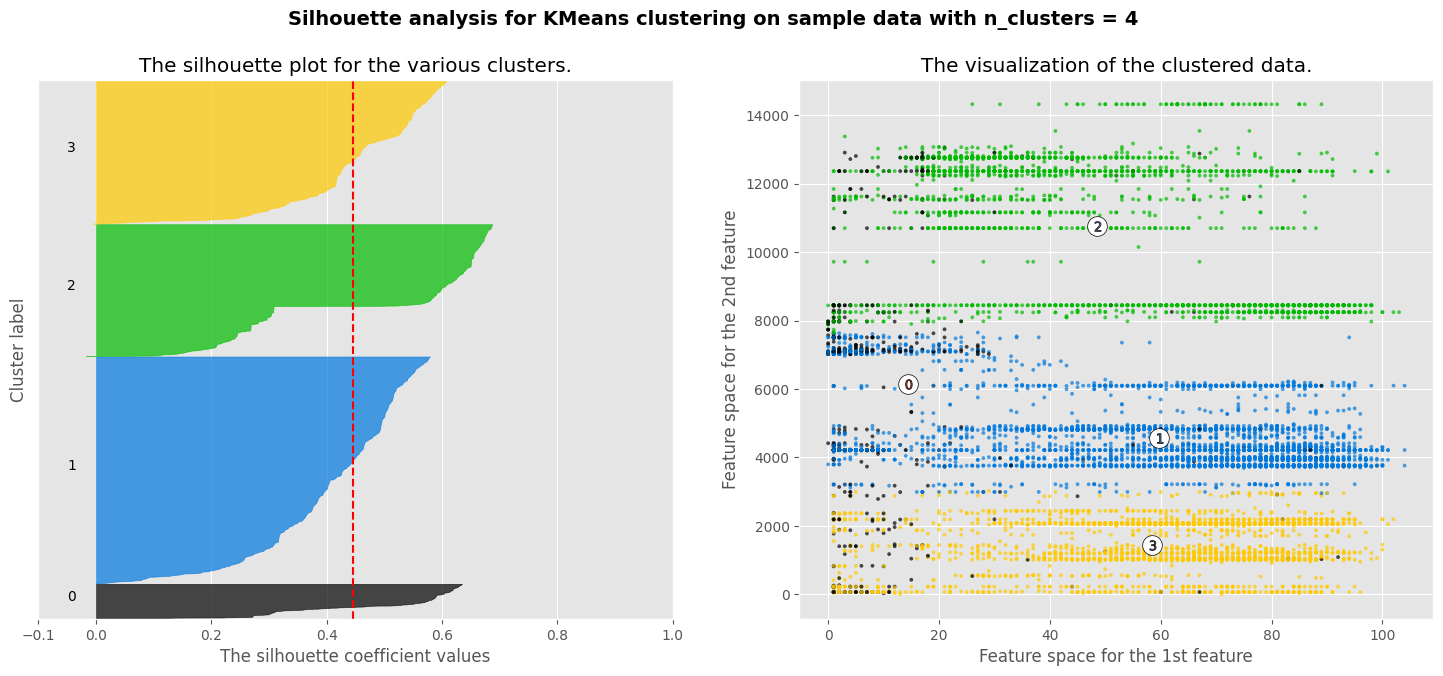

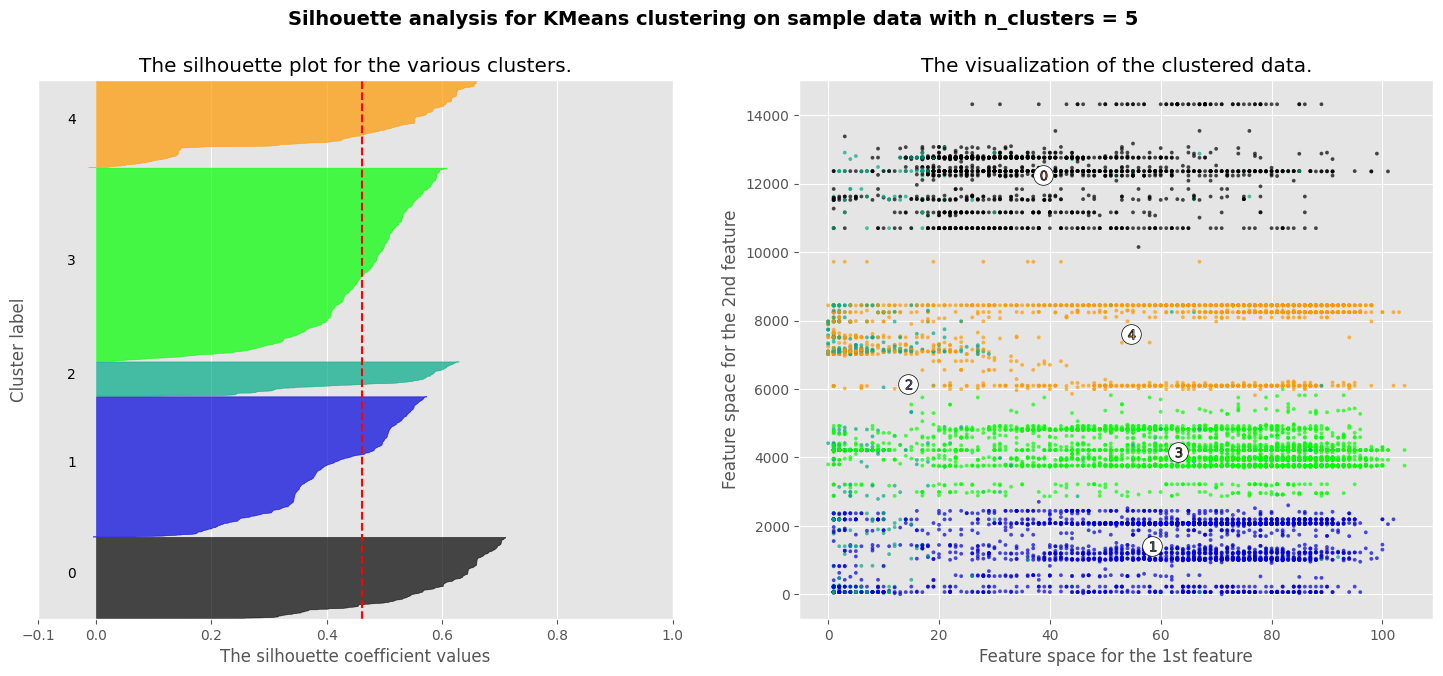

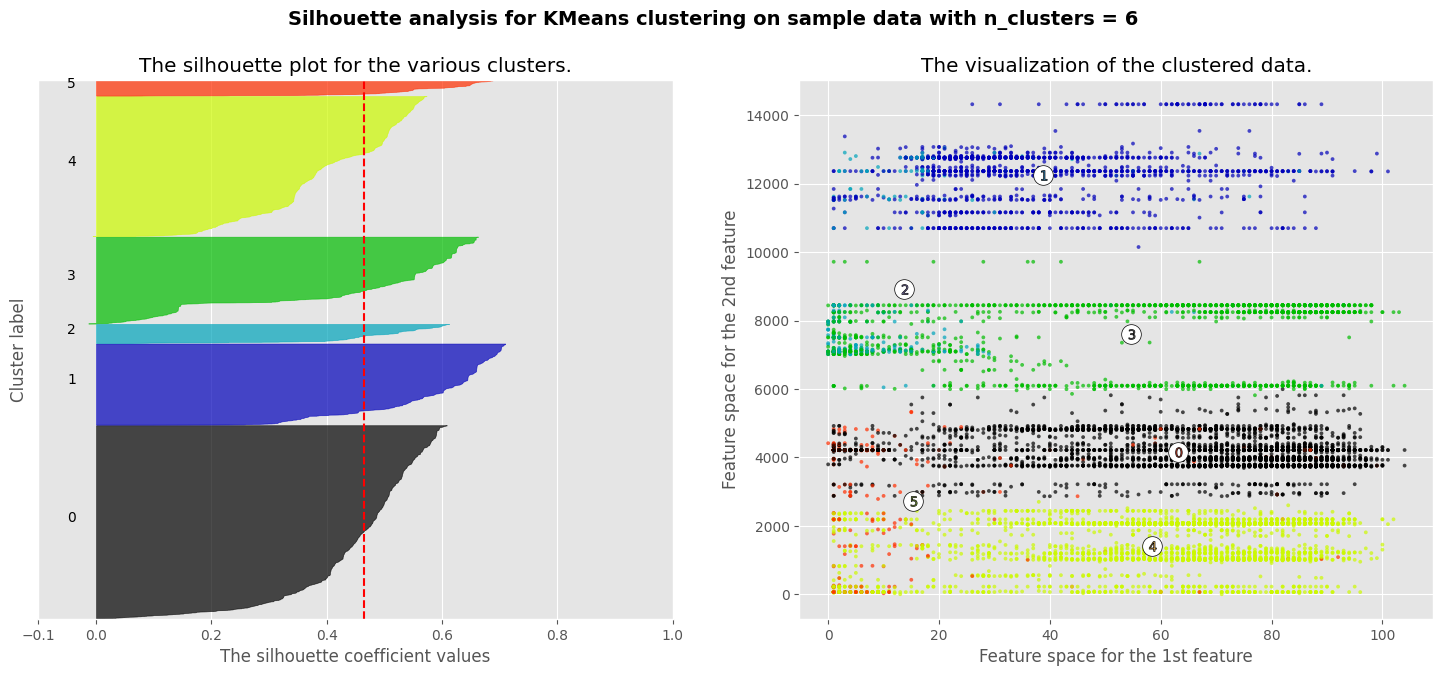

In [41]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
# X, y = make_blobs(
#     n_samples=500,
#     n_features=2,
#     centers=4,
#     cluster_std=1,
#     center_box=(-10.0, 10.0),
#     shuffle=True,
#     random_state=1,
# )  # For reproducibility

range_n_clusters = [2,3,4,5,6]
X
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [42]:
cuarto_grupo = defunciones.loc[defunciones["causa_num"]>900]
primer_grupo = defunciones.loc[defunciones["causa_num"]<=150]
segundo_grupo = defunciones.loc[(defunciones["causa_num"]>150) & (defunciones["Causa_num"] <= 400)]
tercer_grupo = defunciones.loc[(defunciones["causa_num"]>400) & (defunciones["Causa_num"] <= 900)]

values = [len(primer_grupo), len(segundo_grupo), len(tercer_grupo), len(cuarto_grupo)]
uniques = [len(primer_grupo["Caudef"].unique()),len(segundo_grupo["Caudef"].unique()), len(tercer_grupo["Caudef"].unique()), len(cuarto_grupo["Caudef"].unique())]
cuarto_grupo["Caudef"].unique()
merged_cuatro = pd.merge(cuarto_grupo, enfermedades, left_on="Caudef", right_on="CAUSA", how="left")
merged_uno = pd.merge(primer_grupo, enfermedades, left_on="Caudef", right_on="CAUSA", how="left")
merged_dos = pd.merge(segundo_grupo, enfermedades, left_on="Caudef", right_on="CAUSA", how="left")
merged_tres = pd.merge(tercer_grupo, enfermedades, left_on="Caudef", right_on="CAUSA", how="left")
merged_uno["Causa_num"].hist()


mayores_muertes  = merged_uno.loc[merged_uno["Causa_num"]<15]


mayores_muertes["DESCRIP"]

KeyError: 'Causa_num'

In [ ]:
merged_dos["Causa_num"].hist()
merged_tres["Causa_num"].hist()
merged_cuatro["Causa_num"].hist()

segundas_mayores  = merged_uno.loc[(merged_uno["Causa_num"]>30) & (merged_uno["Causa_num"]<45)]
segundas_mayores["DESCRIP"]

In [ ]:
merged_dos["DESCRIP"].unique()

In [ ]:
merged_tres["DESCRIP"].unique()

In [ ]:
merged_cuatro["DESCRIP"].unique()

In [ ]:
hombres = merged_uno.loc[merged_uno["Sexo"]==1].dropna()
mujeres =  merged_uno.loc[merged_uno["Sexo"]==2].dropna()
plt.hist(merged_uno["Causa_num"], bins=150)

plt.hist(hombres["Causa_num"], bins=150)

plt.hist(mujeres["Causa_num"], bins=150)
plt.show()

In [ ]:
causa_uno = merged_uno.loc[merged_uno["Causa_num"]<=20]
a = len(causa_uno.loc[causa_uno["Sexo"]==1])
b = len(causa_uno.loc[causa_uno["Sexo"]==2])
cross = pd.crosstab(index=causa_uno["DESCRIP"], columns="count")
print((a/(a+b)), (b/(a+b)), (a/(a+b)) -  (b/(a+b)))
print(max(defunciones.loc[defunciones["Edadif"]<999]["Edadif"]))
causa_uno["DESCRIP"].unique()
cross.sort_values(by="count", ascending=False)

In [ ]:
merged_uno.loc[merged_uno["Edadif"]<999]["Edadif"].hist()
merged_dos.loc[merged_dos["Edadif"]<999]["Edadif"].hist()
merged_tres.loc[merged_tres["Edadif"]<999]["Edadif"].hist()
merged_cuatro.loc[merged_cuatro["Edadif"]<999]["Edadif"].hist()

In [ ]:
merged_uno["Ocudif"].hist()
merged_dos["Ocudif"].hist()
merged_tres["Ocudif"].hist()
merged_cuatro["Ocudif"].hist()

In [ ]:
#merged_uno.loc[merged_uno["DESCRIP"].]
t1 = pd.crosstab(index=merged_uno["DESCRIP"], columns="count")
t1.sort_values(by="count", ascending=False).head(30)

In [ ]:
t2 = pd.crosstab(index=merged_dos["DESCRIP"], columns="count")
t2.sort_values(by="count", ascending=False).head(30)

In [ ]:
t3 = pd.crosstab(index=merged_tres["DESCRIP"], columns="count")
t3.sort_values(by="count", ascending=False).head(30)

In [ ]:
t4 = pd.crosstab(index=merged_cuatro["DESCRIP"], columns="count")
t4.sort_values(by="count", ascending=False).head(30)

In [ ]:
tabla_frecuencia = pd.crosstab(index=defunciones["Depocu"], columns="count")
tabla_frecuencia
plt.bar([i for i in range(1,23)], tabla_frecuencia["count"])

In [ ]:
import numpy as np
from scipy.stats import norm, probplot, kstest
import matplotlib.pyplot as plt
from scipy.stats import normaltest
import pandas as pd


#Analisis de datos Areag

plt.hist(defunciones['Areag'], bins=30, density=True, alpha=0.5, color='g')
plt.xlabel('Variable')
plt.ylabel('Frecuencia')
plt.show()

# QQ-Plot
probplot(defunciones['Areag'], dist=norm, plot=plt)
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles muestrales')
plt.show()

# Test de Lilliefors
ks_stat, p_val = kstest(defunciones['Areag'], 'norm')
print('KS Estadístico:', ks_stat)
print('Valor-p:', p_val)

# analizar la variable Edadif
stat, p = normaltest(defunciones['Areag'])

# imprimir los resultados
print('Estadístico = %.3f, p-value = %.3f' % (stat, p))
if p > 0.05:
    print('La variable sigue una distribución normal')
else:
    print('La variable no sigue una distribución normal')

In [ ]:
a = set(list(merged_uno["DESCRIP"]))
a.update(list(merged_dos["DESCRIP"]))
a.update(list(merged_tres["DESCRIP"]))

b = set(merged_cuatro["DESCRIP"])

uno = set(list(merged_uno["DESCRIP"]))
dos = set(list(merged_dos["DESCRIP"]))
tres = set(list(merged_tres["DESCRIP"]))

uno - dos

In [ ]:
import numpy as np
from scipy.stats import norm, probplot, kstest
import matplotlib.pyplot as plt
from scipy.stats import normaltest
import pandas as pd


#Analisis de datos Areag

plt.hist(defunciones['Causa_num'], bins=30, density=True, alpha=0.5, color='g')
plt.xlabel('Variable')
plt.ylabel('Frecuencia')
plt.show()

# QQ-Plot
probplot(defunciones['Causa_num'], dist=norm, plot=plt)
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles muestrales')
plt.show()

# Test de Lilliefors
ks_stat, p_val = kstest(defunciones['Causa_num'], 'norm')
print('KS Estadístico:', ks_stat)
print('Valor-p:', p_val)

# analizar la variable Edadif
stat, p = normaltest(defunciones['Causa_num'])

# imprimir los resultados
print('Estadístico = %.3f, p-value = %.3f' % (stat, p))
if p > 0.05:
    print('La variable sigue una distribución normal')
else:
    print('La variable no sigue una distribución normal')

In [ ]:
dendograma = sch.dendrogram(sch.linkage(X, method='ward'))